In [2]:
pip install hvplot holoviews


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries from python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import hvplot.pandas

In [ ]:
# Load the csv files

df_IT= pd.read_csv('HR-Employee-Attrition.csv')
df_health= pd.read_csv('/workspaces/Employee_Turnover_Prediction/watson_healthcare.csv')

Drop unwanted columns from both the dataset

In [5]:
df_IT.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
df_health.drop(['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [6]:
# Check for duplicate rows in IT sector data
df_IT.duplicated().sum()

np.int64(0)

In [7]:
# Check for duplicate rows in healthcare data
df_health.duplicated().sum()

np.int64(56)

As there is 56 duplicate rows in healthcare dataset, so we need to drop those rows

In [8]:
# Drop duplicate rows
df_health.drop_duplicates(inplace=True)

In [9]:
# Basic summary statistics for numerical columns in df_health
df_health.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1620.0,36.954321,9.173660,18.0,30.00,36.0,43.0,60.0
DailyRate,1620.0,802.144444,402.589316,102.0,465.00,798.5,1162.0,1499.0
DistanceFromHome,1620.0,9.191358,8.132347,1.0,2.00,7.0,14.0,29.0
Education,1620.0,2.910494,1.024717,1.0,2.00,3.0,4.0,5.0
EnvironmentSatisfaction,1620.0,2.721605,1.095063,1.0,2.00,3.0,4.0,4.0
HourlyRate,1620.0,65.540123,20.210144,30.0,48.00,66.0,83.0,100.0
JobInvolvement,1620.0,2.722840,0.714517,1.0,2.00,3.0,3.0,4.0
JobLevel,1620.0,2.072222,1.123215,1.0,1.00,2.0,3.0,5.0
JobSatisfaction,1620.0,2.738889,1.102681,1.0,2.00,3.0,4.0,4.0
MonthlyIncome,1620.0,6550.180864,4775.508689,1009.0,2926.00,4899.0,8400.0,19999.0


In [10]:
# Basic summary statistics for numerical columns in df_IT
df_IT.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [11]:
# Compare columns from both the database
pd.DataFrame(df_IT.columns.to_list(), df_health.columns.to_list())

,0
Age,Age
Attrition,Attrition
BusinessTravel,BusinessTravel
DailyRate,DailyRate
Department,Department
DistanceFromHome,DistanceFromHome
Education,Education
EducationField,EducationField
EnvironmentSatisfaction,EnvironmentSatisfaction
Gender,Gender


However, in df_IT dataframe, the column name of 'Shift' is represented as 'StockOptionLevel'

In [12]:
# Rename the column name
df_IT.rename(columns={'StockOptionLevel': 'Shift'}, inplace=True)

In [13]:
# Merge both the datasets row-wise
df_merge = pd.concat([df_IT,df_health],ignore_index=True)

In [14]:
# Check for duplicate value in merged data
df_merge.duplicated().sum()

np.int64(0)

In [15]:
# Shape of data
df_merge.shape

(3090, 31)

In [16]:
# Sample data of df_merge
df_merge.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
3085,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,3,Male,...,3,2,0,1,3,1,1,0,0,0
3086,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,3,Female,...,3,3,1,15,3,3,3,2,1,2
3087,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,4,Female,...,3,4,0,1,0,4,1,0,0,0
3088,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,4,Female,...,3,3,1,21,3,3,21,6,11,8
3089,27,No,Travel_Rarely,511,Cardiology,2,2,Medical,1,Female,...,3,2,0,9,5,2,8,7,0,7


In [17]:
# Display unique value for each numerical data column,
# where unique value of column is less than equal to 20
for col in df_merge.columns:
    if df_merge[col].dtype != 'object' and df_merge[col].nunique() <= 20:
      print(f" {col} : {df_merge[col].unique()}\n")


 Education : [2 1 4 3 5]

 EnvironmentSatisfaction : [2 3 4 1]

 JobInvolvement : [3 2 4 1]

 JobLevel : [2 1 3 4 5]

 JobSatisfaction : [4 2 3 1]

 NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]

 PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]

 PerformanceRating : [3 4]

 RelationshipSatisfaction : [1 4 2 3]

 Shift : [0 1 3 2]

 TrainingTimesLastYear : [0 3 2 5 1 4 6]

 WorkLifeBalance : [1 3 2 4]

 YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]

 YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]

 YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]



In [18]:
# Display count, min and max value for each numerical column,
# where unique value of column is greater than 20
for col in df_merge.columns:
    if df_merge[col].dtype != 'object' and df_merge[col].nunique() > 20:
      print(f" {col} :\n Count: {df_merge[col].nunique()}, Minimum: {df_merge[col].min()}, Maximum: {df_merge[col].max()}\n")


 Age :
 Count: 43, Minimum: 18, Maximum: 60

 DailyRate :
 Count: 886, Minimum: 102, Maximum: 1499

 DistanceFromHome :
 Count: 29, Minimum: 1, Maximum: 29

 HourlyRate :
 Count: 71, Minimum: 30, Maximum: 100

 MonthlyIncome :
 Count: 1349, Minimum: 1009, Maximum: 19999

 MonthlyRate :
 Count: 1427, Minimum: 2094, Maximum: 26999

 TotalWorkingYears :
 Count: 40, Minimum: 0, Maximum: 40

 YearsAtCompany :
 Count: 37, Minimum: 0, Maximum: 40



In [19]:
# Identify categorical columns
categorical_cols = df_merge.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_cols.tolist())

# Display unique values for each categorical column
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f" {df_merge[col].value_counts()}\n")


Categorical Columns:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Unique values in categorical columns:
 Attrition
No     2661
Yes     429
Name: count, dtype: int64

 BusinessTravel
Travel_Rarely        2191
Travel_Frequently     582
Non-Travel            317
Name: count, dtype: int64

 Department
Research & Development    961
Maternity                 789
Cardiology                492
Sales                     446
Neurology                 339
Human Resources            63
Name: count, dtype: int64

 EducationField
Life Sciences       1284
Medical              974
Marketing            332
Technical Degree     275
Other                170
Human Resources       55
Name: count, dtype: int64

 Gender
Male      1853
Female    1237
Name: count, dtype: int64

 JobRole
Nurse                        791
Other                        516
Sales Executive              326
Research Scientist           292
Laboratory Technician   

In [20]:
# Label Encoding
# Convert OverTime to numeric: Yes=1, No=0
df_merge['OverTime'] = df_merge['OverTime'].map({'Yes': 1, 'No': 0})

# Convert Attrition to numeric: Yes=1, No=0
df_merge['Attrition'] = df_merge['Attrition'].map({'Yes': 1, 'No': 0})

# Convert BusinessTravel to numeric
df_merge['BusinessTravel'] = df_merge['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

In [21]:
# One hot Encoding
# Transform categorical data into dummies
dummy_col = [column for column in df_merge.select_dtypes(include=['object']).columns]

# Implementing one-hot encoding
data = pd.get_dummies(df_merge, columns=dummy_col, drop_first=True, dtype='uint8')

# Column info of encoded data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                3090 non-null   int64
 1   Attrition                          3090 non-null   int64
 2   BusinessTravel                     3090 non-null   int64
 3   DailyRate                          3090 non-null   int64
 4   DistanceFromHome                   3090 non-null   int64
 5   Education                          3090 non-null   int64
 6   EnvironmentSatisfaction            3090 non-null   int64
 7   HourlyRate                         3090 non-null   int64
 8   JobInvolvement                     3090 non-null   int64
 9   JobLevel                           3090 non-null   int64
 10  JobSatisfaction                    3090 non-null   int64
 11  MonthlyIncome                      3090 non-null   int64
 12  MonthlyRate         

# Exploratory Data Analysis

Correlation with Attrition:
Attrition                            1.000000
OverTime                             0.287370
MaritalStatus_Single                 0.188963
JobRole_Sales Representative         0.124328
BusinessTravel                       0.104062
JobRole_Laboratory Technician        0.087954
DistanceFromHome                     0.087358
Department_Sales                     0.080109
EducationField_Technical Degree      0.052002
EducationField_Marketing             0.045053
JobRole_Sales Executive              0.035768
JobRole_Human Resources              0.034785
JobRole_Other                        0.031020
NumCompaniesWorked                   0.028809
MonthlyRate                          0.027111
Department_Human Resources           0.021546
JobRole_Research Scientist           0.020670
Gender_Male                          0.007142
PerformanceRating                    0.005694
Department_Research & Development   -0.000850
PercentSalaryHike                   -0.008309
Educat

/tmp/ipykernel_44434/1565624447.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined.values, y=combined.index, palette='coolwarm')


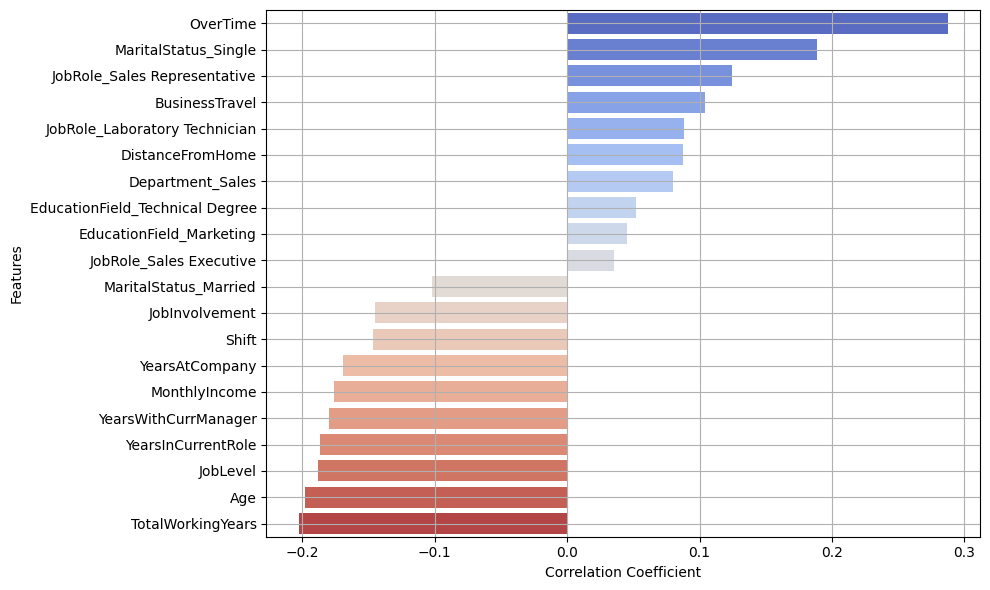

In [ ]:
# Correlation with Attrition
correlation = data.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)

# Display correlation values
print("Correlation with Attrition:")
print(correlation)

# Plot the top 10 positive and negative correlations (excluding Attrition itself)
correlation_filtered = correlation.drop('Attrition')
top_positive = correlation_filtered.head(10)
top_negative = correlation_filtered.tail(10)

# Combine for plotting
combined = pd.concat([top_positive, top_negative])


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=combined.values, y=combined.index, palette='coolwarm')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

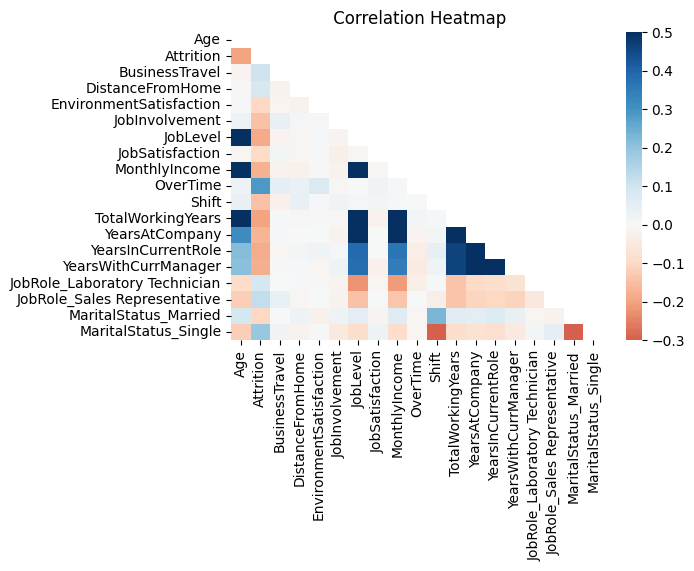

In [ ]:
# Correlation martix with important features
correlation1= data.corr(numeric_only=True)
imp_feat= correlation1['Attrition'].abs() > 0.085
imp_corr= correlation1.loc[imp_feat,imp_feat]

# Triangular Heatmap
mask = np.triu(np.ones_like(imp_corr, dtype=bool))
cmap = sns.diverging_palette(225, 20, as_cmap=True)
plt.figure(figsize=(6,4))
sns.heatmap(imp_corr, mask= mask, cmap='RdBu', center=0, vmin=-0.3, vmax=0.5)
plt.title(" Correlation Heatmap")
plt.show()

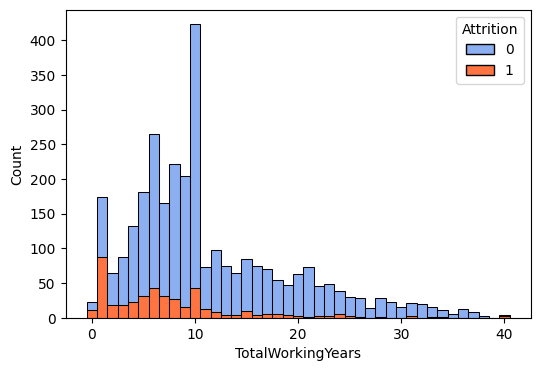

In [ ]:
# Histplot of TotalWorkingYears with Attrition
plt.figure(figsize=(6, 4))
sns.histplot(data=df_merge, x='TotalWorkingYears', hue='Attrition', multiple='stack', discrete= True, palette=['cornflowerblue', 'orangered'])
plt.show()

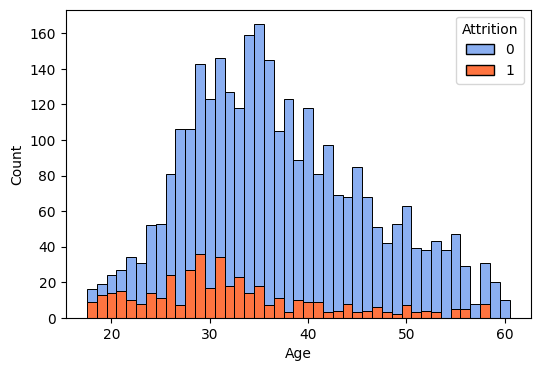

In [ ]:
# Histplot of Age with Attrition
plt.figure(figsize=(6, 4))
sns.histplot(data=df_merge, x='Age', hue='Attrition', multiple='stack', discrete= True, palette= ['cornflowerblue', 'orangered'])
plt.show()

In [26]:
# Histplot of MonthlyIncome with Attrition

data.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=10, ylabel='Count', color=['cornflowerblue', 'orangered'])

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (Count)

In [27]:
# Histplot of OverTime with Attrition

data.hvplot.hist(y='OverTime', by='Attrition', subplots=False, width=600, height=300, ylabel= 'Frequency', color=['cornflowerblue', 'orangered'])

:NdOverlay   [Attrition]
   :Histogram   [OverTime]   (Count)

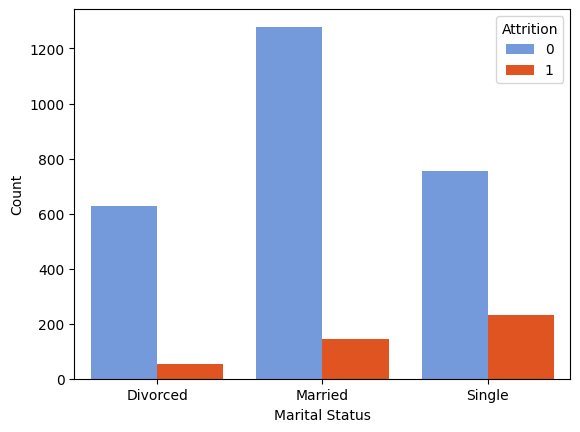

In [ ]:
# Barplot of MaritalStatus with Attrition
df = df_merge.groupby('MaritalStatus')['Attrition'].value_counts()
sns.barplot(x=df.index.get_level_values(0), y=df.values, hue=df.index.get_level_values(1), palette=['cornflowerblue', 'orangered'],  )
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Attrition', axis=1)
y = data.Attrition

# Split the dataset into training and testing ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

# Standard Scaling
standard_scaler = StandardScaler()
X_train_std = standard_scaler.fit_transform(X_train)
X_test_std = standard_scaler.transform(X_test)


In [30]:
y.value_counts()

Attrition
0    2661
1     429
Name: count, dtype: int64

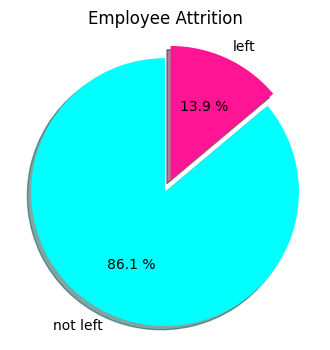

In [ ]:
# Create the pie chart of Attrition
x=data.drop(["Attrition"],axis=1)
y=data["Attrition"]

count_class = y.value_counts() # Count the occurrences of each class

plt.figure(figsize=(4,4))
plt.pie(
    count_class.values,
    labels= ['not left', 'left'],
    colors= ['cyan', 'deeppink'] ,
    explode= (0, 0.1),
    autopct='%1.1f %%',
    shadow=True,
    startangle=90
)

plt.axis('equal')  # Equal aspect ratio ensures it's a circle
plt.title('Employee Attrition', fontsize=12)
plt.show()


In [32]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [33]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE technique to balance the class

smote = SMOTE(sampling_strategy='minority', random_state= 42)
X_train_std_resampled, y_train_std_resampled = smote.fit_resample(X_train_std, y_train)
y_train_std_resampled.value_counts()

Attrition
0    1863
1    1863
Name: count, dtype: int64

In [34]:
from sklearn.decomposition import PCA

# Apply PCA (after SMOTE)
pca1 = PCA(n_components=.95)  # Reduce till 95% variance dimensions
X_train_std_pca = pca1.fit_transform(X_train_std_resampled)
X_test_std_pca = pca1.transform(X_test_std)

In [35]:
# Apply PCA (no SMOTE)
pca2 = PCA(n_components=.95)  # Reduce till 95% variance dimensions
X_train_pca = pca2.fit_transform(X_train_std)
X_test_pca = pca2.transform(X_test_std)

In [36]:
print("Explained variance:", pca1.explained_variance_ratio_)
print("Cumulative:", np.cumsum(pca1.explained_variance_ratio_))

Explained variance: [0.10273578 0.0667912  0.0559344  0.05075459 0.04257552 0.03726726
 0.03469943 0.0322137  0.03136117 0.02904106 0.02701256 0.02661453
 0.02429189 0.02345616 0.02179644 0.02161916 0.02126157 0.02053876
 0.01989468 0.01963403 0.01923503 0.0189894  0.01826217 0.01746528
 0.01666181 0.01627306 0.01579651 0.01518869 0.01486654 0.01435153
 0.01393285 0.01374024 0.01354097 0.01349709 0.01283435 0.01181767]
Cumulative: [0.10273578 0.16952697 0.22546138 0.27621596 0.31879148 0.35605874
 0.39075817 0.42297187 0.45433304 0.4833741  0.51038666 0.53700119
 0.56129308 0.58474923 0.60654567 0.62816483 0.6494264  0.66996516
 0.68985985 0.70949388 0.72872891 0.74771831 0.76598048 0.78344576
 0.80010757 0.81638063 0.83217714 0.84736583 0.86223237 0.8765839
 0.89051676 0.904257   0.91779797 0.93129507 0.94412942 0.95594709]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a function to evaluate the model
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"PRECISION SCORE:\n{precision_score(y_test, y_test_pred):.4f}")
    print(f"RECALL SCORE:\n{recall_score(y_test, y_test_pred):.4f}")
    print(f"F1 SCORE:\n{f1_score(y_test, y_test_pred):.4f}")
    print(f"AUC SCORE:\n{roc_auc_score(y_test, y_test_pred):.4f}")
    print("===============================")

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# Logistic Regression with SMOTE and PCA
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std_pca, y_train_std_resampled)

evaluate(lr_clf, X_train_std_pca, X_test_std_pca, y_train_std_resampled, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1542  321]
 [ 247 1616]]
ACCURACY SCORE:
0.8476
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.861934     0.834280  0.847558     0.848107      0.848107
recall        0.827697     0.867418  0.847558     0.847558      0.847558
f1-score      0.844469     0.850526  0.847558     0.847498      0.847498
support    1863.000000  1863.000000  0.847558  3726.000000   3726.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[665 133]
 [ 28 101]]
ACCURACY SCORE:
0.8263
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.959596    0.431624  0.826321    0.695610      0.886124
recall       0.833333    0.782946  0.826321    0.808140      0.826321
f1-score     0.892019    0.556474  0.826321    0.724246      0.845325
support    798.000000  129.000000  0.826321  927.000000    927.000000
PRECISION SCORE:
0.4316
RECALL SCORE:
0.7829
F1 SCORE:
0.5565
AUC SCORE

In [40]:
# Logistic Regression with SMOTE
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std_resampled, y_train_std_resampled)

evaluate(lr_clf, X_train_std_resampled, X_test_std, y_train_std_resampled, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1562  301]
 [ 235 1628]]
ACCURACY SCORE:
0.8561
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.869226     0.843961  0.856146     0.856594      0.856594
recall        0.838433     0.873859  0.856146     0.856146      0.856146
f1-score      0.853552     0.858650  0.856146     0.856101      0.856101
support    1863.000000  1863.000000  0.856146  3726.000000   3726.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[672 126]
 [ 29 100]]
ACCURACY SCORE:
0.8328
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.958631    0.442478  0.832794    0.700554      0.886803
recall       0.842105    0.775194  0.832794    0.808650      0.832794
f1-score     0.896598    0.563380  0.832794    0.729989      0.850228
support    798.000000  129.000000  0.832794  927.000000    927.000000
PRECISION SCORE:
0.4425
RECALL SCORE:
0.7752
F1 SCORE:
0.5634
AUC SCORE

In [41]:
# Logistic Regression with PCA
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_pca, y_train)

evaluate(lr_clf, X_train_pca, X_test_pca, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1822   41]
 [ 144  156]]
ACCURACY SCORE:
0.9145
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.926755    0.791878  0.914471     0.859317      0.908048
recall        0.977992    0.520000  0.914471     0.748996      0.914471
f1-score      0.951685    0.627767  0.914471     0.789726      0.906758
support    1863.000000  300.000000  0.914471  2163.000000   2163.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[779  19]
 [ 68  61]]
ACCURACY SCORE:
0.9061
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.919717    0.762500  0.906149    0.841108      0.897839
recall       0.976190    0.472868  0.906149    0.724529      0.906149
f1-score     0.947112    0.583732  0.906149    0.765422      0.896545
support    798.000000  129.000000  0.906149  927.000000    927.000000
PRECISION SCORE:
0.7625
RECALL SCORE:
0.4729
F1 SCORE:
0.5837
AUC SCORE:
0.7

In [42]:
# Logistic Regression without SMOTE/PCA
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1816   47]
 [ 142  158]]
ACCURACY SCORE:
0.9126
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.927477    0.770732  0.912621     0.849104      0.905737
recall        0.974772    0.526667  0.912621     0.750719      0.912621
f1-score      0.950537    0.625743  0.912621     0.788140      0.905489
support    1863.000000  300.000000  0.912621  2163.000000   2163.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[775  23]
 [ 64  65]]
ACCURACY SCORE:
0.9061
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.923719    0.738636  0.906149    0.831178      0.897963
recall       0.971178    0.503876  0.906149    0.737527      0.906149
f1-score     0.946854    0.599078  0.906149    0.772966      0.898458
support    798.000000  129.000000  0.906149  927.000000    927.000000
PRECISION SCORE:
0.7386
RECALL SCORE:
0.5039
F1 SCORE:
0.5991
AUC SCORE:
0.7

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Random Forest with SMOTE and PCA

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42,
                                   max_depth=15
                                    )
rf_clf.fit(X_train_std_pca, y_train_std_resampled)

evaluate(rf_clf, X_train_std_pca, X_test_std_pca, y_train_std_resampled, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1856    7]
 [   0 1863]]
ACCURACY SCORE:
0.9981
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     1.000000     0.996257  0.998121     0.998128      0.998128
recall        0.996243     1.000000  0.998121     0.998121      0.998121
f1-score      0.998118     0.998125  0.998121     0.998121      0.998121
support    1863.000000  1863.000000  0.998121  3726.000000   3726.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[748  50]
 [ 64  65]]
ACCURACY SCORE:
0.8770
CLASSIFICATION REPORT:
                    0           1  accuracy  macro avg  weighted avg
precision    0.921182    0.565217  0.877023    0.74320      0.871647
recall       0.937343    0.503876  0.877023    0.72061      0.877023
f1-score     0.929193    0.532787  0.877023    0.73099      0.874029
support    798.000000  129.000000  0.877023  927.00000    927.000000
PRECISION SCORE:
0.5652
RECALL SCORE:
0.5039
F1 SCORE:
0.5328
AUC SCORE:
0.7

In [45]:
# Random Forest with SMOTE

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=4,
                                max_depth= None )
rf_clf.fit(X_train_std_resampled, y_train_std_resampled)

evaluate(rf_clf, X_train_std_resampled, X_test_std, y_train_std_resampled, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1860    3]
 [   1 1862]]
ACCURACY SCORE:
0.9989
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999463     0.998391  0.998926     0.998927      0.998927
recall        0.998390     0.999463  0.998926     0.998926      0.998926
f1-score      0.998926     0.998927  0.998926     0.998926      0.998926
support    1863.000000  1863.000000  0.998926  3726.000000   3726.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[776  22]
 [ 39  90]]
ACCURACY SCORE:
0.9342
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.952147    0.803571  0.934196    0.877859      0.931472
recall       0.972431    0.697674  0.934196    0.835053      0.934196
f1-score     0.962182    0.746888  0.934196    0.854535      0.932222
support    798.000000  129.000000  0.934196  927.000000    927.000000
PRECISION SCORE:
0.8036
RECALL SCORE:
0.6977
F1 SCORE:
0.7469
AUC SCORE

In [46]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

Text(0.5, 0, 'Feature Importance Score')

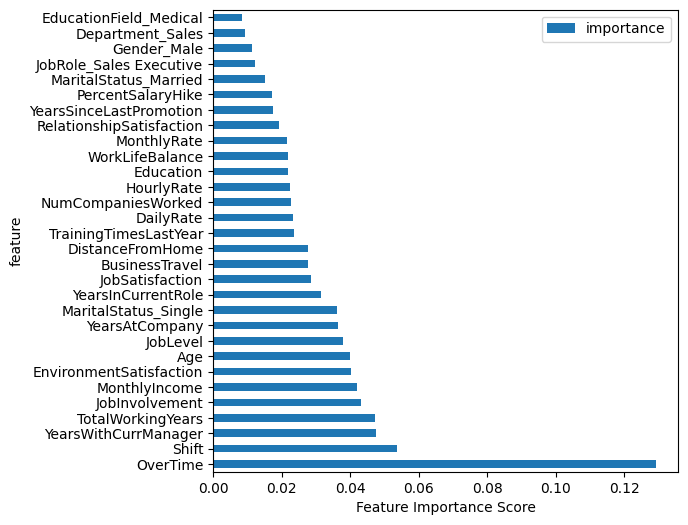

In [47]:
# Feature Importance according to Random Forest

df = feature_imp(X, rf_clf)[:30]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(6, 6))
plt.xlabel('Feature Importance Score')

In [48]:
# Random Forest with PCA

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42,
                                max_depth=15
                                    )
rf_clf.fit(X_train_pca, y_train)

evaluate(rf_clf, X_train_pca, X_test_pca, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1863    0]
 [   8  292]]
ACCURACY SCORE:
0.9963
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.995724    1.000000  0.996301     0.997862      0.996317
recall        1.000000    0.973333  0.996301     0.986667      0.996301
f1-score      0.997858    0.986486  0.996301     0.992172      0.996280
support    1863.000000  300.000000  0.996301  2163.000000   2163.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[793   5]
 [105  24]]
ACCURACY SCORE:
0.8813
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.883073    0.827586  0.881338    0.855330      0.875352
recall       0.993734    0.186047  0.881338    0.589890      0.881338
f1-score     0.935142    0.303797  0.881338    0.619469      0.847285
support    798.000000  129.000000  0.881338  927.000000    927.000000
PRECISION SCORE:
0.8276
RECALL SCORE:
0.1860
F1 SCORE:
0.3038
AUC SCORE:
0.5

In [49]:
# Random Forest without SMOTE or PCA

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=4,
                                max_depth= None )

rf_clf.fit(X_train_std, y_train)

evaluate(rf_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1861    2]
 [   2  298]]
ACCURACY SCORE:
0.9982
CLASSIFICATION REPORT:
                     0           1  accuracy   macro avg  weighted avg
precision     0.998926    0.993333  0.998151     0.99613      0.998151
recall        0.998926    0.993333  0.998151     0.99613      0.998151
f1-score      0.998926    0.993333  0.998151     0.99613      0.998151
support    1863.000000  300.000000  0.998151  2163.00000   2163.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[782  16]
 [ 54  75]]
ACCURACY SCORE:
0.9245
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.935407    0.824176  0.924488    0.879791      0.919928
recall       0.979950    0.581395  0.924488    0.780673      0.924488
f1-score     0.957160    0.681818  0.924488    0.819489      0.918844
support    798.000000  129.000000  0.924488  927.000000    927.000000
PRECISION SCORE:
0.8242
RECALL SCORE:
0.5814
F1 SCORE:
0.6818
AUC SCORE:
0.7807


# Linear-SVM

In [50]:
from sklearn.svm import SVC

In [51]:
# Linear-SVM with SMOTE and PCA

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std_pca, y_train_std_resampled)

evaluate(svm_clf, X_train_std_pca, X_test_std_pca, y_train_std_resampled, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1548  315]
 [ 254 1609]]
ACCURACY SCORE:
0.8473
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.859046     0.836279  0.847289     0.847662      0.847662
recall        0.830918     0.863661  0.847289     0.847289      0.847289
f1-score      0.844748     0.849749  0.847289     0.847248      0.847248
support    1863.000000  1863.000000  0.847289  3726.000000   3726.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[671 127]
 [ 30  99]]
ACCURACY SCORE:
0.8306
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.957204    0.438053  0.830636    0.697629      0.884960
recall       0.840852    0.767442  0.830636    0.804147      0.830636
f1-score     0.895264    0.557746  0.830636    0.726505      0.848295
support    798.000000  129.000000  0.830636  927.000000    927.000000
PRECISION SCORE:
0.4381
RECALL SCORE:
0.7674
F1 SCORE:
0.5577
AUC SCORE

In [52]:
# Linear-SVM with SMOTE

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std_resampled, y_train_std_resampled)

evaluate(svm_clf, X_train_std_resampled, X_test_std, y_train_std_resampled, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1570  293]
 [ 227 1636]]
ACCURACY SCORE:
0.8604
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.873678     0.848108   0.86044     0.860893      0.860893
recall        0.842727     0.878154   0.86044     0.860440      0.860440
f1-score      0.857923     0.862869   0.86044     0.860396      0.860396
support    1863.000000  1863.000000   0.86044  3726.000000   3726.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[667 131]
 [ 29 100]]
ACCURACY SCORE:
0.8274
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.958333    0.432900    0.8274    0.695617      0.885215
recall       0.835840    0.775194    0.8274    0.805517      0.827400
f1-score     0.892905    0.555556    0.8274    0.724230      0.845960
support    798.000000  129.000000    0.8274  927.000000    927.000000
PRECISION SCORE:
0.4329
RECALL SCORE:
0.7752
F1 SCORE:
0.5556
AUC SCORE

In [53]:
# Linear-SVM with PCA

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_pca, y_train)

evaluate(svm_clf, X_train_pca, X_test_pca, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1824   39]
 [ 146  154]]
ACCURACY SCORE:
0.9145
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.925888    0.797927  0.914471     0.861908      0.908141
recall        0.979066    0.513333  0.914471     0.746200      0.914471
f1-score      0.951735    0.624746  0.914471     0.788241      0.906383
support    1863.000000  300.000000  0.914471  2163.000000   2163.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[779  19]
 [ 65  64]]
ACCURACY SCORE:
0.9094
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.922986    0.771084  0.909385    0.847035      0.901847
recall       0.976190    0.496124  0.909385    0.736157      0.909385
f1-score     0.948843    0.603774  0.909385    0.776308      0.900824
support    798.000000  129.000000  0.909385  927.000000    927.000000
PRECISION SCORE:
0.7711
RECALL SCORE:
0.4961
F1 SCORE:
0.6038
AUC SCORE:
0.7

In [54]:
# Linear-SVM without SMOTE or PCA

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1821   42]
 [ 146  154]]
ACCURACY SCORE:
0.9131
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.925775    0.785714  0.913084     0.855745      0.906349
recall        0.977456    0.513333  0.913084     0.745395      0.913084
f1-score      0.950914    0.620968  0.913084     0.785941      0.905152
support    1863.000000  300.000000  0.913084  2163.000000   2163.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[774  24]
 [ 60  69]]
ACCURACY SCORE:
0.9094
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.928058    0.741935  0.909385    0.834997      0.902157
recall       0.969925    0.534884  0.909385    0.752404      0.909385
f1-score     0.948529    0.621622  0.909385    0.785076      0.903037
support    798.000000  129.000000  0.909385  927.000000    927.000000
PRECISION SCORE:
0.7419
RECALL SCORE:
0.5349
F1 SCORE:
0.6216
AUC SCORE:
0.7

# Radial Basis Function SVM

In [55]:
# GridSearch (with SMOTE and PCA data)
from sklearn.model_selection import GridSearchCV
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100], 'kernel': ['linear']},
    {'C': [.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=5, refit=True, verbose=1)
search.fit(X_train_std_pca, y_train_std_resampled)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


,estimator,SVC(random_state=42)
,param_grid,"[{'C': [1, 10, ...], 'kernel': ['linear']}, {'C': [0.1, 1, ...], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [56]:
# RBF-SVM with SMOTE and PCA

svm_clf = SVC(kernel='rbf', C=10, gamma=0.001)
svm_clf.fit(X_train_std_pca, y_train_std_resampled)

evaluate(svm_clf, X_train_std_pca, X_test_std_pca, y_train_std_resampled, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1577  286]
 [ 217 1646]]
ACCURACY SCORE:
0.8650
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.879041     0.851967  0.865003     0.865504      0.865504
recall        0.846484     0.883521  0.865003     0.865003      0.865003
f1-score      0.862456     0.867457  0.865003     0.864956      0.864956
support    1863.000000  1863.000000  0.865003  3726.000000   3726.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[681 117]
 [ 31  98]]
ACCURACY SCORE:
0.8403
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.956461    0.455814  0.840345    0.706137      0.886791
recall       0.853383    0.759690  0.840345    0.806537      0.840345
f1-score     0.901987    0.569767  0.840345    0.735877      0.855756
support    798.000000  129.000000  0.840345  927.000000    927.000000
PRECISION SCORE:
0.4558
RECALL SCORE:
0.7597
F1 SCORE:
0.5698
AUC SCORE

In [57]:
# GridSearch (with SMOTE data)
from sklearn.model_selection import GridSearchCV
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100], 'kernel': ['linear']},
    {'C': [.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=5, refit=True, verbose=1)
search.fit(X_train_std_resampled, y_train_std_resampled)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


,estimator,SVC(random_state=42)
,param_grid,"[{'C': [1, 10, ...], 'kernel': ['linear']}, {'C': [0.1, 1, ...], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [58]:
# RBF-SVM with SMOTE

svm_clf = SVC(kernel='rbf', C=10, gamma=0.001)
svm_clf.fit(X_train_std_resampled, y_train_std_resampled)

evaluate(svm_clf, X_train_std_resampled, X_test_std, y_train_std_resampled, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1617  246]
 [ 194 1669]]
ACCURACY SCORE:
0.8819
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.892877     0.871540  0.881911     0.882209      0.882209
recall        0.867955     0.895867  0.881911     0.881911      0.881911
f1-score      0.880240     0.883536  0.881911     0.881888      0.881888
support    1863.000000  1863.000000  0.881911  3726.000000   3726.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[685 113]
 [ 32  97]]
ACCURACY SCORE:
0.8436
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.955370    0.461905  0.843581    0.708637      0.886700
recall       0.858396    0.751938  0.843581    0.805167      0.843581
f1-score     0.904290    0.572271  0.843581    0.738281      0.858087
support    798.000000  129.000000  0.843581  927.000000    927.000000
PRECISION SCORE:
0.4619
RECALL SCORE:
0.7519
F1 SCORE:
0.5723
AUC SCORE

In [59]:
# GridSearch (with PCA only data)
from sklearn.model_selection import GridSearchCV
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100], 'kernel': ['linear']},
    {'C': [.1, 1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=5, refit=True, verbose=1)
search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


,estimator,SVC(random_state=42)
,param_grid,"[{'C': [1, 10, ...], 'kernel': ['linear']}, {'C': [0.1, 1, ...], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [60]:
# RBF-SVM with PCA

svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_pca, y_train)

evaluate(svm_clf, X_train_pca, X_test_pca, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1837   26]
 [ 114  186]]
ACCURACY SCORE:
0.9353
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.941568    0.877358  0.935275     0.909463      0.932663
recall        0.986044    0.620000  0.935275     0.803022      0.935275
f1-score      0.963293    0.726562  0.935275     0.844928      0.930459
support    1863.000000  300.000000  0.935275  2163.000000   2163.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[781  17]
 [ 59  70]]
ACCURACY SCORE:
0.9180
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.929762    0.804598  0.918015    0.867180      0.912344
recall       0.978697    0.542636  0.918015    0.760666      0.918015
f1-score     0.953602    0.648148  0.918015    0.800875      0.911095
support    798.000000  129.000000  0.918015  927.000000    927.000000
PRECISION SCORE:
0.8046
RECALL SCORE:
0.5426
F1 SCORE:
0.6481
AUC SCORE:
0.7

In [61]:
# RBF-SVM without SMOTE or PCA

svm_clf = SVC(kernel='rbf', C=100, gamma=0.001)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1836   27]
 [ 106  194]]
ACCURACY SCORE:
0.9385
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.945417    0.877828  0.938511     0.911623      0.936043
recall        0.985507    0.646667  0.938511     0.816087      0.938511
f1-score      0.965046    0.744722  0.938511     0.854884      0.934488
support    1863.000000  300.000000  0.938511  2163.000000   2163.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[781  17]
 [ 56  73]]
ACCURACY SCORE:
0.9213
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.933094    0.811111  0.921251    0.872103      0.916119
recall       0.978697    0.565891  0.921251    0.772294      0.921251
f1-score     0.955352    0.666667  0.921251    0.811009      0.915179
support    798.000000  129.000000  0.921251  927.000000    927.000000
PRECISION SCORE:
0.8111
RECALL SCORE:
0.5659
F1 SCORE:
0.6667
AUC SCORE:
0.7

# Artificial Neural Network

In [62]:
pip install tensorflow


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

2025-08-26 12:37:35.798730: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-26 12:37:35.799138: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 12:37:35.843932: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-26 12:37:37.808225: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [64]:
# ANN with SMOTE and PCA

# Seed
tf.keras.utils.set_random_seed(42)

model_ann = Sequential()
# Input layer and first hidden layer
model_ann.add(Dense(64, activation='relu', input_shape=(X_train_std_pca.shape[1],)))
model_ann.add(Dropout(0.3))        #helps prevent overfitting

# Second hidden layer
model_ann.add(Dense(32, activation='relu'))

# Output layer
model_ann.add(Dense(1, activation='sigmoid'))  # Binary classification

model_ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

history = model_ann.fit(
    X_train_std_pca, y_train_std_resampled,
    validation_data=(X_test_std_pca, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-26 12:37:37.999165: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6785 - auc: 0.7538 - loss: 0.5845 - val_accuracy: 0.7907 - val_auc: 0.8555 - val_loss: 0.4526
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8264 - auc: 0.9047 - loss: 0.3950 - val_accuracy: 0.8403 - val_auc: 0.8825 - val_loss: 0.3641
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8443 - auc: 0.9260 - loss: 0.3462 - val_accuracy: 0.8511 - val_auc: 0.8834 - val_loss: 0.3474
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8663 - auc: 0.9398 - loss: 0.3149 - val_accuracy: 0.8576 - val_auc: 0.8855 - val_loss: 0.3346
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8763 - auc: 0.9471 - loss: 0.2940 - val_accuracy: 0.8544 - val_auc: 0.8899 - val_loss: 0.3311
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8857 - auc: 0.9561 - loss: 0.2689 - val_accuracy: 0.8630 - val_auc: 0.8895 - val_loss: 0.3280
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 

In [65]:
# Predict on test set
y_test_prob = model_ann.predict(X_test_std_pca).ravel()
y_test_pred = (y_test_prob > 0.5).astype(int)

# Predict on train set
y_train_prob = model_ann.predict(X_train_std_pca).ravel()
y_train_pred = (y_train_prob > 0.5).astype(int)

print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train_std_resampled, y_train_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train_std_resampled, y_train_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_train_std_resampled, y_train_pred):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print(f"PRECISION SCORE:\n{precision_score(y_test, y_test_pred):.4f}")
print(f"RECALL SCORE:\n{recall_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:\n{f1_score(y_test, y_test_pred):.4f}")
print(f"AUC SCORE:\n{roc_auc_score(y_test, y_test_pred):.4f}")
print("===============================")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1846   17]
 [   0 1863]]
ACCURACY SCORE:
0.9954
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     1.000000     0.990957  0.995437     0.995479      0.995479
recall        0.990875     1.000000  0.995437     0.995437      0.995437
f1-score      0.995417     0.995458  0.995437     0.995437      0.995437
support    1863.000000  1863.000000  0.995437  3726.000000   3726.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[761  37]
 [ 53  76]]
ACCURACY SCORE:
0.9029
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.934889    0.672566  0.902913    0.803728      0.898385
recall       0.953634    0.589147  0.902913    0.771391      0.902913
f1-score     0.944169    0.628099  0.902913    0.786134      0.900185
support    798.000000  129.000000  0.902913  927.000000   

In [66]:
# ANN with SMOTE

# Seed
tf.keras.utils.set_random_seed(40)

model_ann = Sequential()
# Input layer and first hidden layer
model_ann.add(Dense(64, activation='relu', input_shape=(X_train_std_resampled.shape[1],)))
model_ann.add(Dropout(0.3))        #helps prevent overfitting

# Second hidden layer
model_ann.add(Dense(32, activation='relu'))

# Output layer
model_ann.add(Dense(1, activation='sigmoid'))  # Binary classification

model_ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model_ann.fit(
    X_train_std_resampled, y_train_std_resampled,
    validation_data=(X_test_std, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7163 - loss: 0.5436 - val_accuracy: 0.7896 - val_loss: 0.4575
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8296 - loss: 0.3929 - val_accuracy: 0.8252 - val_loss: 0.3939
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.3238 - val_accuracy: 0.8328 - val_loss: 0.3712
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8717 - loss: 0.3023 - val_accuracy: 0.8501 - val_loss: 0.3505
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8838 - loss: 0.2703 - val_accuracy: 0.8587 - val_loss: 0.3426
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9018 - loss: 0.2437 - val_accuracy: 0.8673 - val_loss: 0.3374
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9082 - loss: 0.2284 - val_accuracy: 0.8716 - val_loss: 0.3292
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9087 - loss: 0.2256 - val_accuracy: 0.8706 - val_

In [67]:
# Predict on test set
y_test_prob = model_ann.predict(X_test_std).ravel()
y_test_pred = (y_test_prob > 0.5).astype(int)

# Predict on train set
y_train_prob = model_ann.predict(X_train_std_resampled).ravel()
y_train_pred = (y_train_prob > 0.5).astype(int)

print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train_std_resampled, y_train_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train_std_resampled, y_train_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_train_std_resampled, y_train_pred):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print(f"PRECISION SCORE:\n{precision_score(y_test, y_test_pred):.4f}")
print(f"RECALL SCORE:\n{recall_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:\n{f1_score(y_test, y_test_pred):.4f}")
print(f"AUC SCORE:\n{roc_auc_score(y_test, y_test_pred):.4f}")
print("===============================")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1855    8]
 [   0 1863]]
ACCURACY SCORE:
0.9979
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     1.000000     0.995724  0.997853     0.997862      0.997862
recall        0.995706     1.000000  0.997853     0.997853      0.997853
f1-score      0.997848     0.997858  0.997853     0.997853      0.997853
support    1863.000000  1863.000000  0.997853  3726.000000   3726.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[761  37]
 [ 49  80]]
ACCURACY SCORE:
0.9072
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.939506    0.683761  0.907228    0.811633      0.903917
recall       0.953634    0.620155  0.907228    0.786895      0.907228
f1-score     0.946517    0.650407  0.907228    0.798462      0.905311
support    798.000000  129.000000  0.907228  927.000000   

In [68]:
# ANN with PCA

# Seed
tf.keras.utils.set_random_seed(32)

model_ann = Sequential()
# Input layer and first hidden layer
model_ann.add(Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)))
model_ann.add(Dropout(0.3))        #helps prevent overfitting

# Second hidden layer
model_ann.add(Dense(32, activation='relu'))

# Output layer
model_ann.add(Dense(1, activation='sigmoid'))  # Binary classification

model_ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model_ann.fit(
    X_train_pca, y_train,
    validation_data=(X_test_pca, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7522 - loss: 0.5361 - val_accuracy: 0.8608 - val_loss: 0.3702
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3540 - val_accuracy: 0.8630 - val_loss: 0.3155
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8692 - loss: 0.3152 - val_accuracy: 0.8975 - val_loss: 0.2822
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8863 - loss: 0.2799 - val_accuracy: 0.9072 - val_loss: 0.2638
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9020 - loss: 0.2593 - val_accuracy: 0.9115 - val_loss: 0.2571
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9080 - loss: 0.2532 - val_accuracy: 0.9105 - val_loss: 0.2524
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9066 - loss: 0.2445 - val_accuracy: 0.9115 - val_loss: 0.2529
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9071 - loss: 0.2362 - val_accuracy: 0.9115 - val_loss: 0.2517
Epo

In [69]:
# Predict on test set
y_test_prob = model_ann.predict(X_test_pca).ravel()
y_test_pred = (y_test_prob > 0.5).astype(int)

# Predict on train set
y_train_prob = model_ann.predict(X_train_pca).ravel()
y_train_pred = (y_train_prob > 0.5).astype(int)

print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print(f"PRECISION SCORE:\n{precision_score(y_test, y_test_pred):.4f}")
print(f"RECALL SCORE:\n{recall_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:\n{f1_score(y_test, y_test_pred):.4f}")
print(f"AUC SCORE:\n{roc_auc_score(y_test, y_test_pred):.4f}")
print("===============================")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1858    5]
 [  44  256]]
ACCURACY SCORE:
0.9773
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.976866    0.980843  0.977346     0.978855      0.977418
recall        0.997316    0.853333  0.977346     0.925325      0.977346
f1-score      0.986985    0.912656  0.977346     0.949821      0.976676
support    1863.000000  300.000000  0.977346  2163.000000   2163.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[780  18]
 [ 62  67]]
ACCURACY SCORE:
0.9137
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.926366    0.788235    0.9137    0.857301      0.907144
recall       0.977444    0.519380    0.9137    0.748412      0.913700
f1-score     0.951220    0.626168    0.9137    0.788694      0.905986
support    798.000000  129.000000    0.9137  927.000000    927.000

In [70]:
# ANN without SMOTE or PCA

# Set random seeds for reproducibility
tf.keras.utils.set_random_seed(40)

model_ann = Sequential()

# Input layer and first hidden layer
model_ann.add(Dense(64, activation='relu', input_shape=(X_train_std.shape[1],)))
model_ann.add(Dropout(0.3))  # Prevent overfitting

# Second hidden layer
model_ann.add(Dense(32, activation='relu'))

# Output layer
model_ann.add(Dense(1, activation='sigmoid'))  # Binary classification

model_ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

history = model_ann.fit(
    X_train_std, y_train,
    validation_data=(X_test_std, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8553 - auc: 0.6463 - loss: 0.3987 - val_accuracy: 0.8619 - val_auc: 0.7785 - val_loss: 0.3459
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - auc: 0.7994 - loss: 0.3294 - val_accuracy: 0.8803 - val_auc: 0.8399 - val_loss: 0.3086
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8816 - auc: 0.8475 - loss: 0.2967 - val_accuracy: 0.8910 - val_auc: 0.8649 - val_loss: 0.2859
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8904 - auc: 0.8735 - loss: 0.2743 - val_accuracy: 0.8964 - val_auc: 0.8745 - val_loss: 0.2721
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9015 - auc: 0.8881 - loss: 0.2556 - val_accuracy: 0.8943 - val_auc: 0.8795 - val_loss: 0.2676
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9034 - auc: 0.8901 - loss: 0.2531 - val_accuracy: 0.8964 - val_auc: 0.8845 - val_loss: 0.2605
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [71]:
# Predict on test set
y_test_prob = model_ann.predict(X_test_std).ravel()
y_test_pred = (y_test_prob > 0.5).astype(int)

# Predict on train set
y_train_prob = model_ann.predict(X_train_std).ravel()
y_train_pred = (y_train_prob > 0.5).astype(int)

print("TRAINIG RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")

print("TESTING RESULTS: \n===============================")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print(f"PRECISION SCORE:\n{precision_score(y_test, y_test_pred):.4f}")
print(f"RECALL SCORE:\n{recall_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:\n{f1_score(y_test, y_test_pred):.4f}")
print(f"AUC SCORE:\n{roc_auc_score(y_test, y_test_pred):.4f}")
print("===============================")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1858    5]
 [  17  283]]
ACCURACY SCORE:
0.9898
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.990933    0.982639  0.989829     0.986786      0.989783
recall        0.997316    0.943333  0.989829     0.970325      0.989829
f1-score      0.994114    0.962585  0.989829     0.978350      0.989741
support    1863.000000  300.000000  0.989829  2163.000000   2163.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[769  29]
 [ 60  69]]
ACCURACY SCORE:
0.9040
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.927624    0.704082  0.903991    0.815853      0.896516
recall       0.963659    0.534884  0.903991    0.749271      0.903991
f1-score     0.945298    0.607930  0.903991    0.776614      0.898350
support    798.000000  129.000000  0.903991  927.000000    927.00